              Measure     Value
0                Mean  2.774232
1              Median  2.000000
2                Mode  1.000000
3               Range  4.000000
4            Variance  3.359148
5  Standard Deviation  1.832798


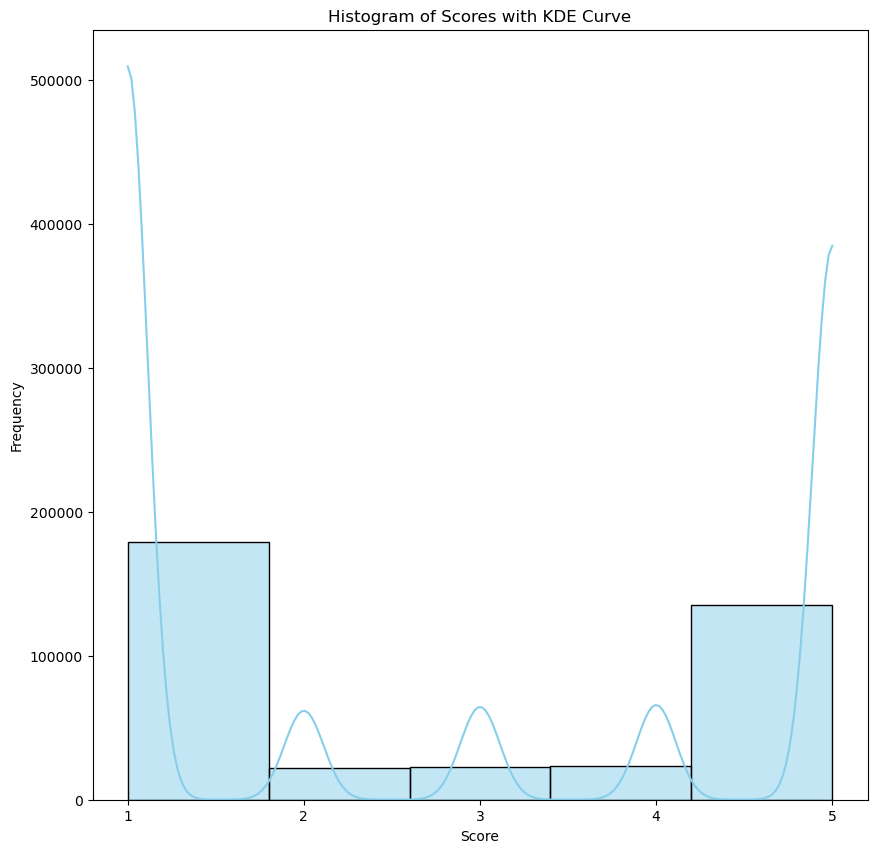

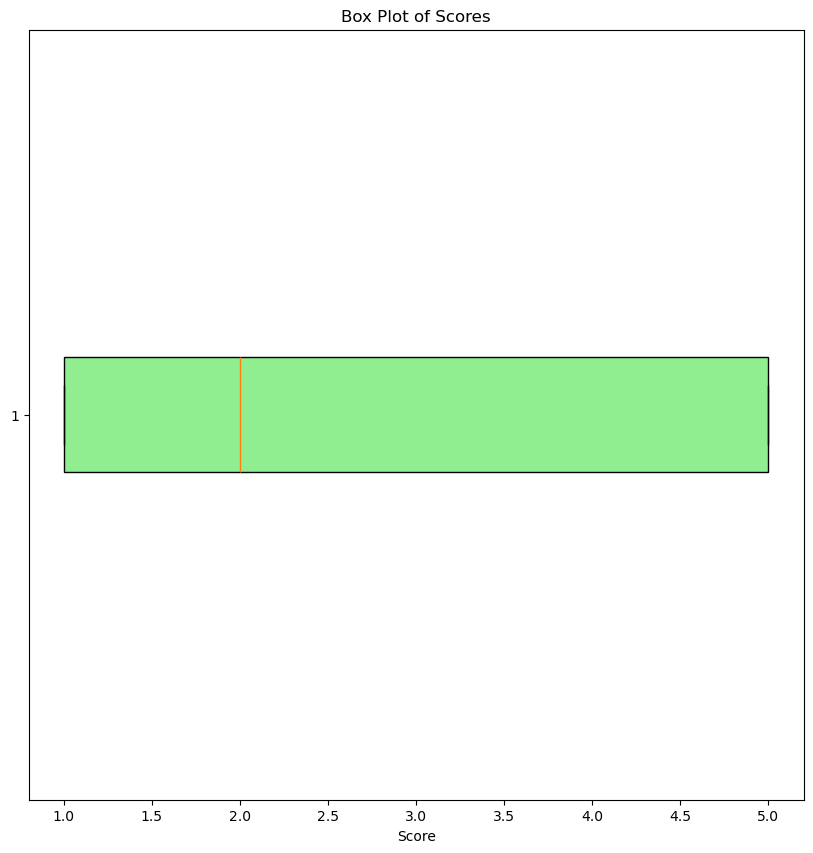

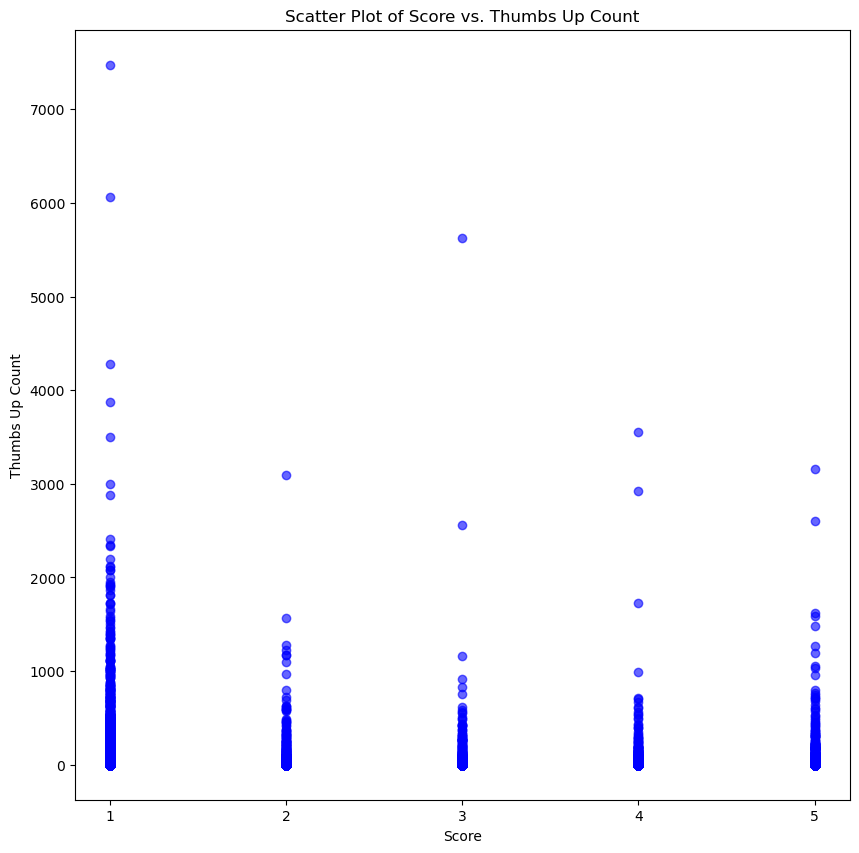

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("messenger_reviews.csv")

# Assuming 'data' is a DataFrame with a 'score' column
mean_score = data['score'].mean()
median_score = data['score'].median()
mode_score = data['score'].mode()[0]

score_range = data['score'].max() - data['score'].min()
score_variance = data['score'].var()
score_std_dev = data['score'].std()

# Creating a DataFrame to display the results in a table
statistics = pd.DataFrame({
    'Measure': ['Mean', 'Median', 'Mode', 'Range', 'Variance', 'Standard Deviation'],
    'Value': [mean_score, median_score, mode_score, score_range, score_variance, score_std_dev]
})

print(statistics)



# Histogram with KDE
plt.figure(figsize=(10, 10))
sns.histplot(data['score'], kde=True, bins=5, color='skyblue', edgecolor='black', kde_kws={'bw_adjust': 0.8})
plt.title("Histogram of Scores with KDE Curve")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.xticks([1, 2, 3, 4, 5])  # Discrete x-axis values
plt.show()

# Box Plot
plt.figure(figsize=(10, 10))
plt.boxplot(data['score'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Box Plot of Scores")
plt.xlabel("Score")
plt.show()

# Scatter Plot with Discrete Axes
plt.figure(figsize=(10, 10))
plt.scatter(data['score'], data['thumbsUpCount'], alpha=0.6, c='blue')
plt.title("Scatter Plot of Score vs. Thumbs Up Count")
plt.xlabel("Score")
plt.ylabel("Thumbs Up Count")
plt.xticks([1, 2, 3, 4, 5])  # Ensure x-axis ticks are discrete
plt.show()


In [62]:
pip install tabulate


In [50]:
import pandas as pd

# Load the dataset
data = pd.read_csv('messenger_reviews.csv')

# Convert 'at' column to datetime
data['at'] = pd.to_datetime(data['at'])

# Extract year and month
data['year_month'] = data['at'].dt.to_period('M')

# Calculate average score per month
monthly_avg_score = data.groupby('year_month')['score'].mean().reset_index()

# Rename columns for clarity
monthly_avg_score.columns = ['Year-Month', 'Average Score']

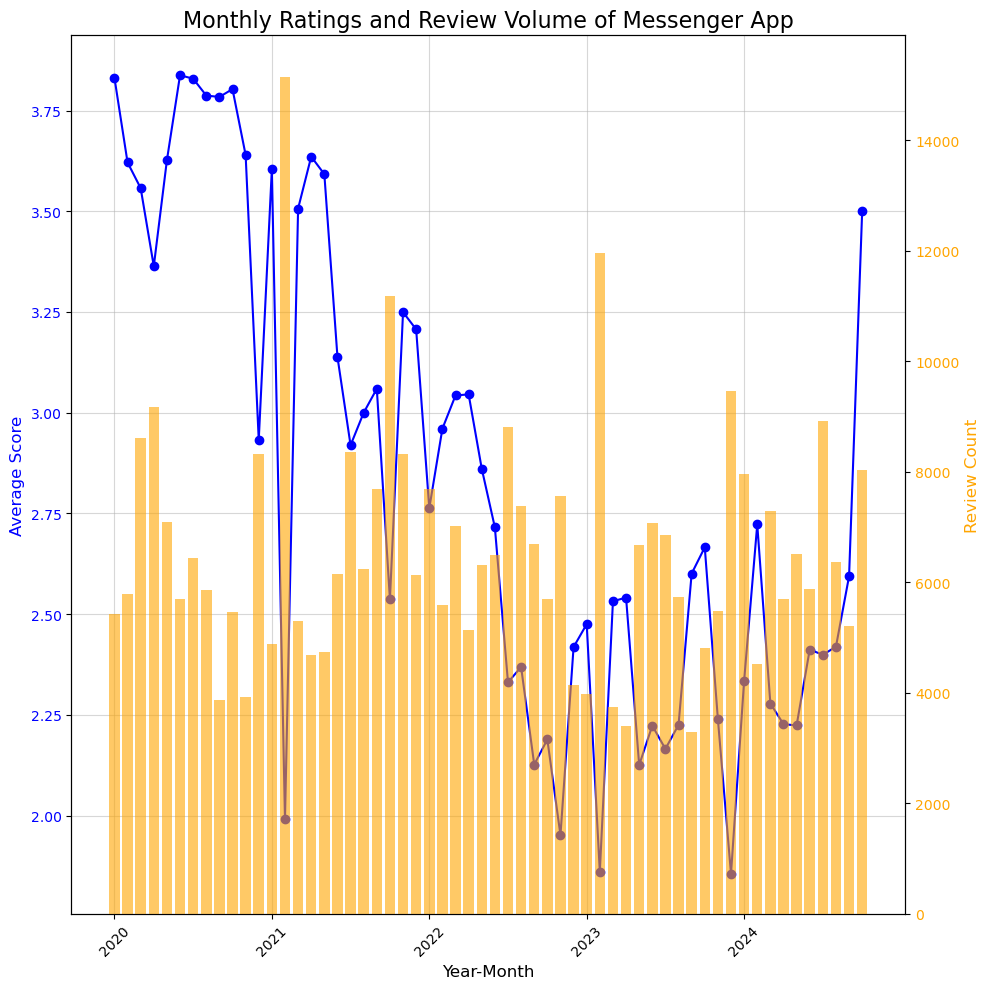

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('messenger_reviews.csv')

# Convert 'at' column to datetime
data['at'] = pd.to_datetime(data['at'])

# Extract year and month
data['year_month'] = data['at'].dt.to_period('M')

# Calculate average score per month
monthly_avg_score = data.groupby('year_month')['score'].mean().reset_index()

# Rename columns for clarity
monthly_avg_score.columns = ['Year-Month', 'Average Score']

# Count reviews per month
monthly_review_count = data.groupby('year_month')['userName'].count().reset_index()
monthly_review_count.columns = ['Year-Month', 'Review Count']

# Plot both metrics
fig, ax1 = plt.subplots(figsize=(10, 10))

# Average score line plot
ax1.plot(monthly_avg_score['Year-Month'].astype(str), monthly_avg_score['Average Score'], marker='o', color='blue', label='Average Score')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Average Score', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(alpha=0.5)

# Review count bar plot
ax2 = ax1.twinx()
ax2.bar(monthly_review_count['Year-Month'].astype(str), monthly_review_count['Review Count'], color='orange', alpha=0.6, label='Review Count')
ax2.set_ylabel('Review Count', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Modify x-ticks to show only year
ax1.set_xticks([i for i, label in enumerate(monthly_avg_score['Year-Month'].astype(str)) if i % 12 == 0])  # Show every 12th month (i.e., a new year)
ax1.set_xticklabels([str(year) for year in monthly_avg_score['Year-Month'].dt.year[::12]], rotation=45)

# Title and layout
plt.title('Monthly Ratings and Review Volume of Messenger App', fontsize=16)
fig.tight_layout()
plt.show()
